In [1]:
import dataset
import matplotlib.pyplot as plt
import tree_search
import bounds
import numpy as np
import sympy
sympy.init_printing()

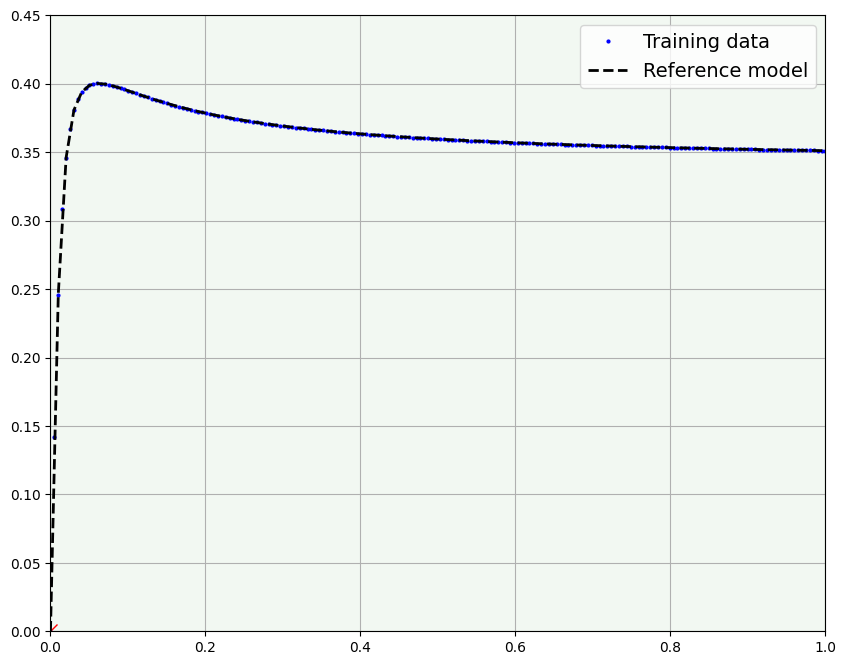

In [2]:
S = dataset.ABSDataset()
#S.xl = -10
#S.xu = 10
S.sample(size=200, noise=0.0, mesh=True)
#S.load('data/magman.csv')
#S.erase(0.3, 0.7)
#S.split()  # train_size=0.7 by default
#S.data.append(dataset.DataPoint(-500000, +0.0000001))
#S.data.append(dataset.DataPoint(+500000, -0.0000001))
S.plot()

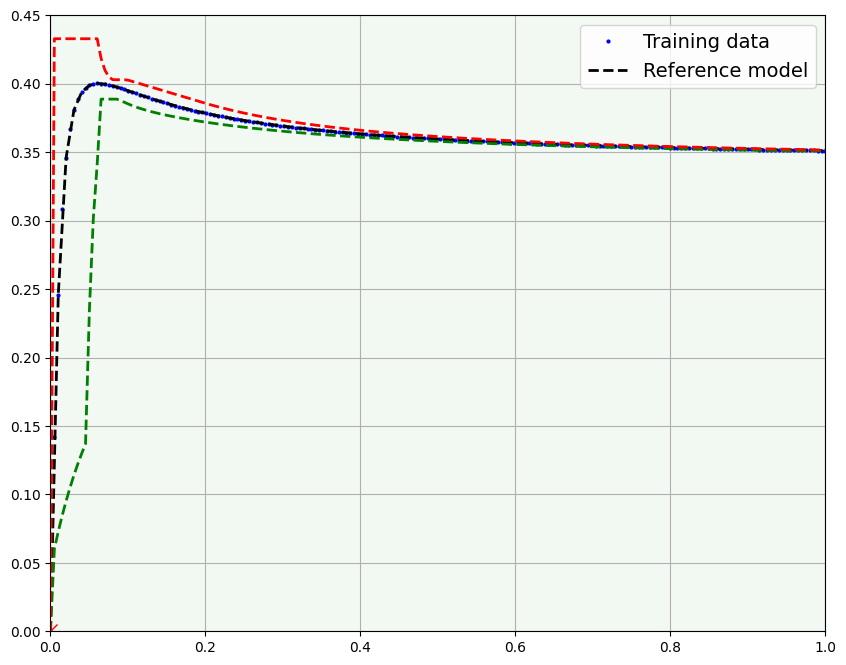

In [3]:
bin_bounds = bounds.compute_bounds(S, 200)
bounds.plot_bounds(S, bin_bounds)

In [5]:
stree, data_tuning_report, knowledge_image_tuning_report, knowledge_deriv_tuning_report = \
    tree_search.infer_syntaxtree(S, bin_bounds=bin_bounds, max_degree=2, max_degree_inner=1, max_depth=10, trials=150, pk_pressure=0.)

if data_tuning_report is not None:
    print(f"\nData Root found:    {data_tuning_report['root_found']}")
    print(f"Data MSE:             {data_tuning_report['mse']}")
    print(f"Data R2:              {1 - (data_tuning_report['sse'] / S.data_sst)}")
    print(f"Solution:             {data_tuning_report['sol']}")

if knowledge_image_tuning_report is not None:
    print(f"\nKnowledge (image) Root found: {knowledge_image_tuning_report['root_found']}")
    print(f"Knowledge (image) MSE:        {knowledge_image_tuning_report['mse']}")
    print(f"Solution:                     {knowledge_image_tuning_report['sol']}")

if knowledge_deriv_tuning_report is not None:
    print(f"\nKnowledge (deriv) Root found: {knowledge_deriv_tuning_report['root_found']}")
    print(f"Knowledge (deriv) MSE:        {knowledge_deriv_tuning_report['mse']}")

if stree is not None:
    print(f"\nModel: " + stree.tostring())

"""import seq_qp
seq_qp.infer_syntaxtree(stree, S)
S.plot()
x = np.linspace(S.xl, S.xu, 300)
plt.plot(x, stree.evaluate(x), linestyle='solid', linewidth=2, color='green', label='Data model');"""

[0, 0], [0, 400], [400, 400], [400, 400]
Total data constraints:      200
Total knowledge constraints: 400
========== Syntax Tree Inference ==========
TREE FOUND P_a(x)/P_b(x)
ACTUAL RESTARTS: 5

Data tuning (avg time):      0 ms
Knowledge tuning (avg time):   0 ms
Data tuning (total time):      43 ms
Knowledge tuning (total time): 0 ms

Get system (avg time): 0 ms
Get system (total time): 38 ms
Get system (total calls): 984

Setcoeffs (total time): 0 ms

Data Root found:    False
Data MSE:             2.978977791156736e-05
Data R2:              0.9745721172467529
Solution:             [ 9.66478923e+02  2.88475337e+00 -4.93452737e-04  2.71536248e+03
  6.31940999e+00  4.74813854e-02]

Model: P_a(x)/P_b(x)


"import seq_qp\nseq_qp.infer_syntaxtree(stree, S)\nS.plot()\nx = np.linspace(S.xl, S.xu, 300)\nplt.plot(x, stree.evaluate(x), linestyle='solid', linewidth=2, color='green', label='Data model');"

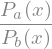

In [ ]:
sympy.parse_expr(stree.tostring(), evaluate=False)

In [ ]:
"""S.plot()
bounds.plot_bounds(S, bin_bounds)

x = np.linspace(S.xl, S.xu, 300)
#x = np.linspace(-50, 50, 300)

if data_tuning_report is not None:
    stree.set_coeffs(data_tuning_report['sol'].tolist())
    plt.plot(x, stree.evaluate(x), linestyle='solid', linewidth=2, color='green', label='Data model');

if knowledge_image_tuning_report is not None:
    stree.set_coeffs(knowledge_image_tuning_report['sol'].tolist())
    plt.plot(x, stree.evaluate(x), linestyle='solid', linewidth=2, color='red',   label='Knowledge (image) model');

if knowledge_deriv_tuning_report is not None:
    stree.set_coeffs(knowledge_deriv_tuning_report['sol'].tolist())
    plt.plot(x, stree.evaluate(x), linestyle='solid', linewidth=2, color='orange',   label='Knowledge (deriv) model');"""

"S.plot()\nbounds.plot_bounds(S, bin_bounds)\n\nx = np.linspace(S.xl, S.xu, 300)\n#x = np.linspace(-50, 50, 300)\n\nif data_tuning_report is not None:\n    stree.set_coeffs(data_tuning_report['sol'].tolist())\n    plt.plot(x, stree.evaluate(x), linestyle='solid', linewidth=2, color='green', label='Data model');\n\nif knowledge_image_tuning_report is not None:\n    stree.set_coeffs(knowledge_image_tuning_report['sol'].tolist())\n    plt.plot(x, stree.evaluate(x), linestyle='solid', linewidth=2, color='red',   label='Knowledge (image) model');\n\nif knowledge_deriv_tuning_report is not None:\n    stree.set_coeffs(knowledge_deriv_tuning_report['sol'].tolist())\n    plt.plot(x, stree.evaluate(x), linestyle='solid', linewidth=2, color='orange',   label='Knowledge (deriv) model');"

========== Syntax Tree Enhancement ==========
[0, 1], [1, 6], [6, 6], [6, 16]
[Restart #1] MSE improvement from None to 2.758294330247713e-05
[Restart #2] MSE improvement from 2.758294330247713e-05 to 2.758294330082176e-05
[Restart #3] No improvement.
[Restart #4] MSE improvement from 2.758294330082176e-05 to 2.7582943300794282e-05
[Restart #5] No improvement.
[Restart #6] No improvement.
[Restart #7] No improvement.
[Restart #8] No improvement.
[Restart #9] No improvement.
[Restart #10] No improvement.
[Restart #11] No improvement.
[Restart #12] MSE improvement from 2.7582943300794282e-05 to 2.7582943300793862e-05
[Restart #13] No improvement.
[Restart #14] No improvement.
[Restart #15] No improvement.
[Restart #16] No improvement.
[Restart #17] No improvement.
[Restart #18] No improvement.
[Restart #19] No improvement.
[Restart #20] No improvement.
Training MSE: 2.7582943300793862e-05


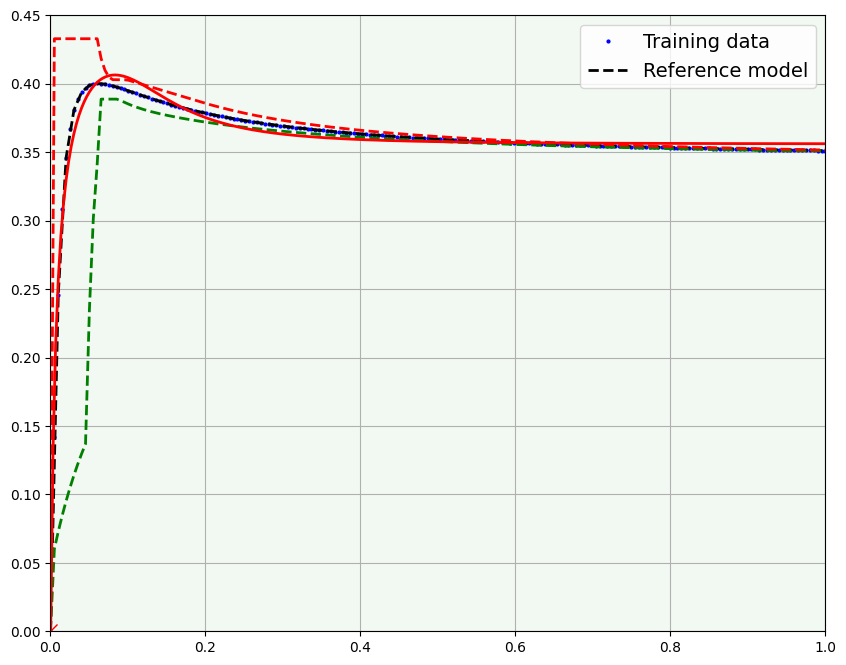

In [ ]:
#
# model enhancement
#

sample_size = 5
n_restarts  = 20

bin_bounds = bounds.compute_bounds(S, 200)
#bounds.clean_data(S, bin_bounds)
best_tuning_report = tree_search.enhance_syntax_tree(stree, S, sample_size, bin_bounds=None, n_restarts=n_restarts, data_weight=1, knowledge_weight=0.)

#S.data = S.data[:len(S.data)-2]

S.plot()
bounds.plot_bounds(S, bin_bounds)
x = np.linspace(S.xl, S.xu, 300)
#x = np.linspace(-50, 50, 300)
stree.set_coeffs(best_tuning_report['sol'].tolist())
plt.plot(x, stree.evaluate(x), linestyle='solid', linewidth=2, color='red', label='Final model');

best_tuning_report['sol'].tolist()

In [ ]:
#
# model testing
#

test_mse, test_r2, pk_sat_ration, pk_sat_count, pk_sat_size = tree_search.test_syntax_tree(stree, S, sample_size=1000)
print(f"Test MSE:       {test_mse}")
print(f"Test R2:        {test_r2}")
print(f"PK sat ratio:   {pk_sat_ration}")
print(f"PK sat count:   {pk_sat_count}")
print(f"PK sat size:    {pk_sat_size}")

========== Syntax Tree Testing ==========


ZeroDivisionError: float division by zero